In [1]:
import random
from colorutils import Color
from configs import CFG1
from generators import create_image

In [2]:
import pandas as pd

messages = pd.read_csv("texts/message_samples.csv")
options = pd.read_csv("texts/option_samples.csv")
names = pd.read_csv("texts/name_samples.csv")
messages.shape, options.shape, names.shape

((14, 5), (16, 3), (9, 2))

'<ruby>天真<rt>てんしん</rt></ruby>らんまんを装っておられるところを見ると、そのつもりはないようではありますが'

'エヴァンジェリン・ディ・トニーエル'

'あなた<ruby>方<rt>かた</rt></ruby>の<ruby>護衛<rt>ごえい</rt></ruby>が――!'

'<ruby>奴<rt>やつ</rt></ruby>ら、もう<ruby>一人<rt>ひとり</rt></ruby>......お忘れですわね。'

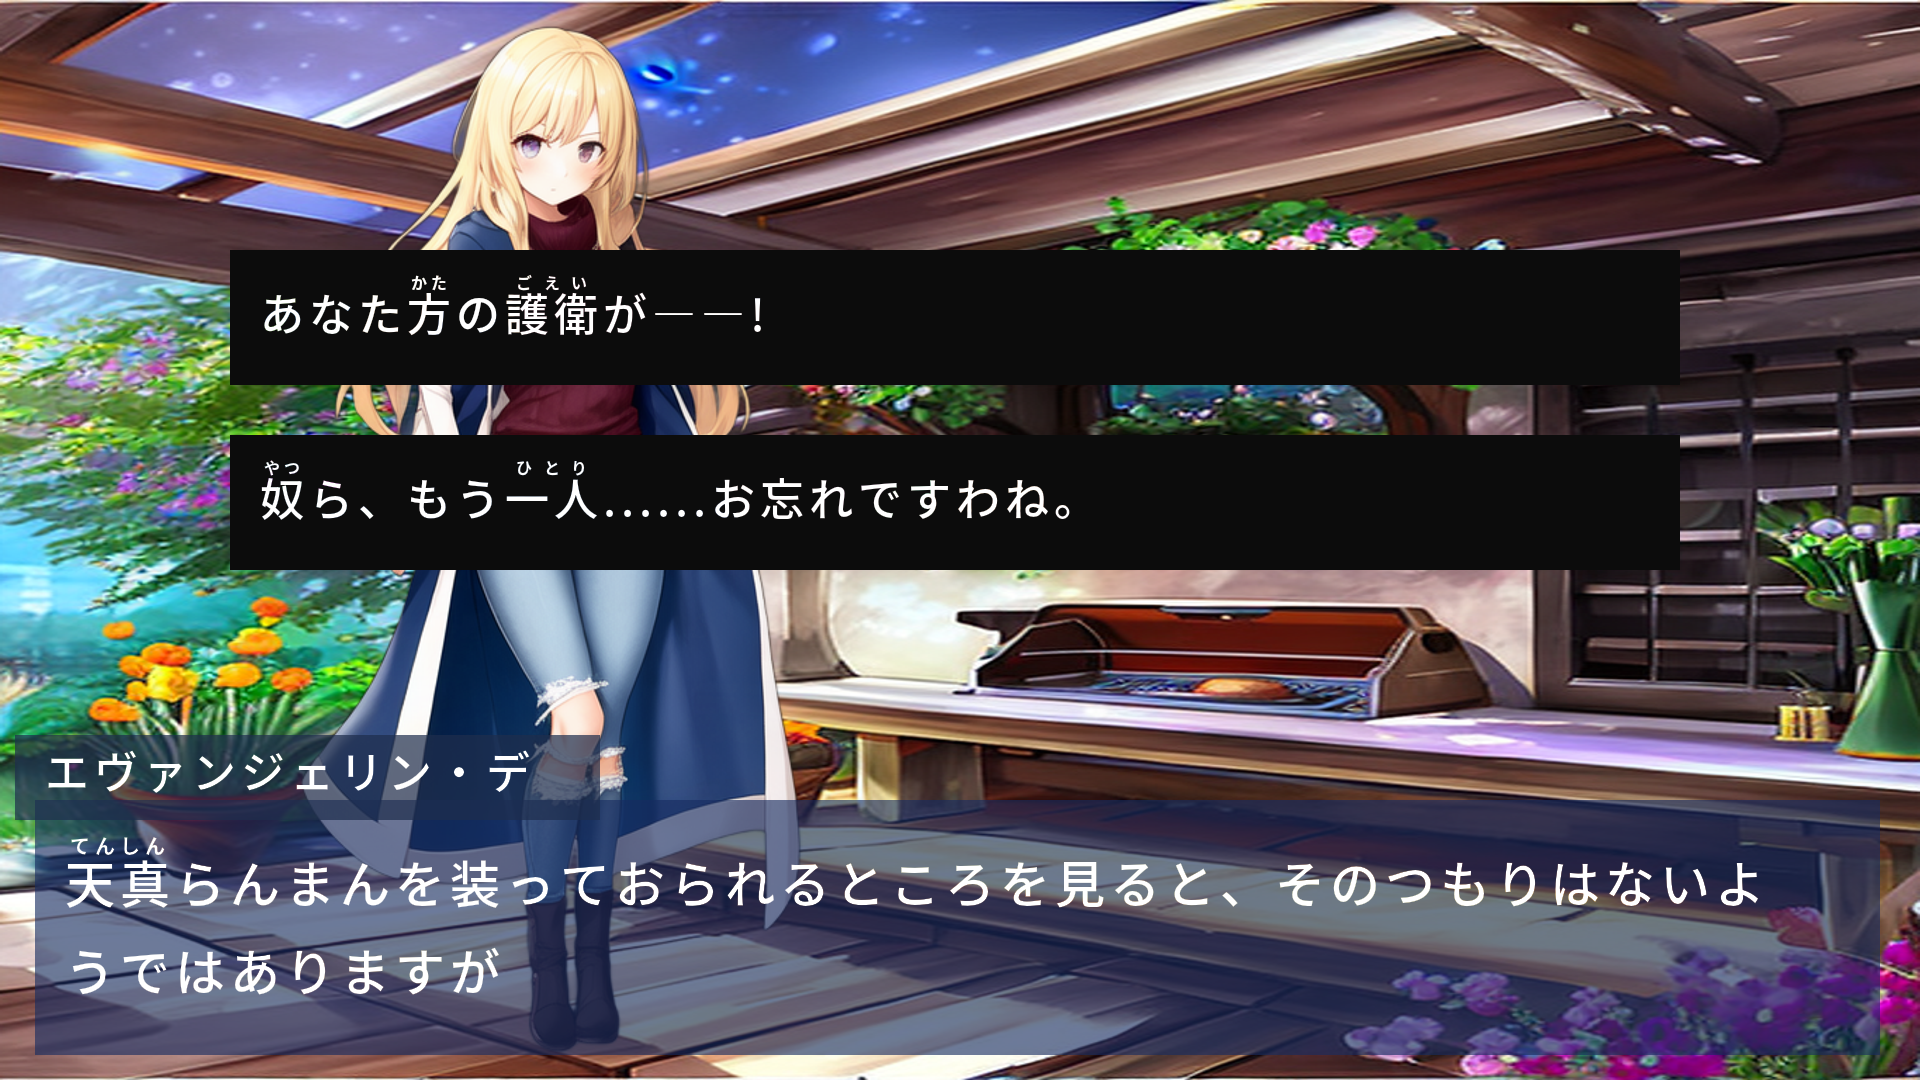

In [4]:
cfg = CFG1()

text = messages.sample(1)["text_ruby_hiragana"].values[0]
cfg.text = text

name_text, name_ruby = names.sample(1)[["name", "ruby"]].values[0]
if type(name_ruby) == str:
    name_text = f"<ruby>{name_text}<rt>{name_ruby}</rt></ruby>"
cfg.name_text = name_text

option_text = options.sample(1)["text_ruby_hiragana"].values[0]
option2_text = options.sample(1)["text_ruby_hiragana"].values[0]
cfg.option_texts = [option_text, option2_text]

cfg.fg_tl_list = [(200, 0)]
output = create_image(cfg)

display(text, name_text, option_text, option2_text)
display(output.image)

In [4]:
output.text, output.name_text, output.option_texts

('<ruby>辺鄙<rt>へんぴ</rt></ruby>で、<ruby>人族<rt>ひとぞく</rt></ruby>は住めない<ruby>地域<rt>ちいき</rt></ruby>ですが......それでも『<ruby>精霊<rt>せいれい</rt></ruby>の<ruby>森<rt>もり</rt></ruby>』と呼ばれています',
 'Amber Kay Khan',
 ['<ruby>史籍局<rt>しせききょく</rt></ruby>からの<ruby>情報<rt>じょうほう</rt></ruby>、ですか。',
  'さすが<ruby>我<rt>われ</rt></ruby>らの<ruby>父<rt>ちち</rt></ruby>!'])

In [ ]:
output.img.save("./outputs/image.png")

In [5]:
import datasets
ds = datasets.load_from_disk("./output_datasets/dataset_2000/")
ds

Dataset({
    features: ['image', 'ground_truth'],
    num_rows: 2000
})